### Построение онтологических эмбеддингов графов знаний
---

### Аннотация

Многие крупномасштабные базы знаний представляются в виде двух графов заний (*Knowledge Graph (KG)*): онтологии (*ontology-view*), - **граф для общих и обстрактных концепций** (*concepts*) и связей между ними (*meta-relations*), - и **графа сущностей** (*entity-view*, *entities*), - конкретных представителей концепций. Между этими двумя графами также существует связь в виде наличия/отсутствия между некоторыми концепциями и сущностями отношения вложенности (*type links*). 

На изображении ниже приведен пример такого двойного представления графа знаний:

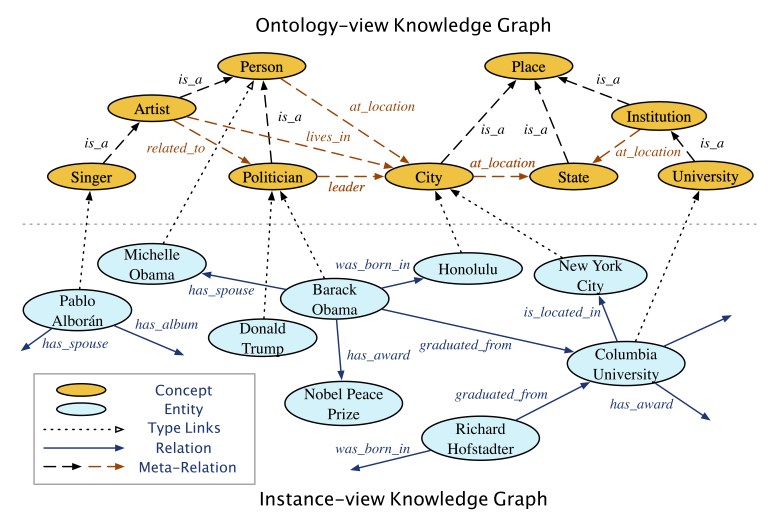


В статье *J. Hao, M. Chen, W. Yu, Y. Sun, W. Wang "Universal Representation Learning of Knowledge Bases by
Jointly Embedding Instances and Ontological Concepts", KDD, August 4–8, 2019* (https://dl.acm.org/doi/pdf/10.1145/3292500.3330838) предлагается реализация метода JOIE, использующего одновременно и моделирование внутри каждого графа в отдельности (*intra-view modeling*), и перекрестное моделирование (*cross-view modeling*).

**Cross-view** моделирование используется для поиска связей между сущностями и концепциями, то есть определяет, какой онтологической сущности соответствует конкретный экземпляр сущности.

**Intra-view** моделирование служит для нахождения структуры внутри отдельно взятого графа. Например, устанавливает связи отношений (наличие и вид отношений) между представителями сущностей. 

Ниже более

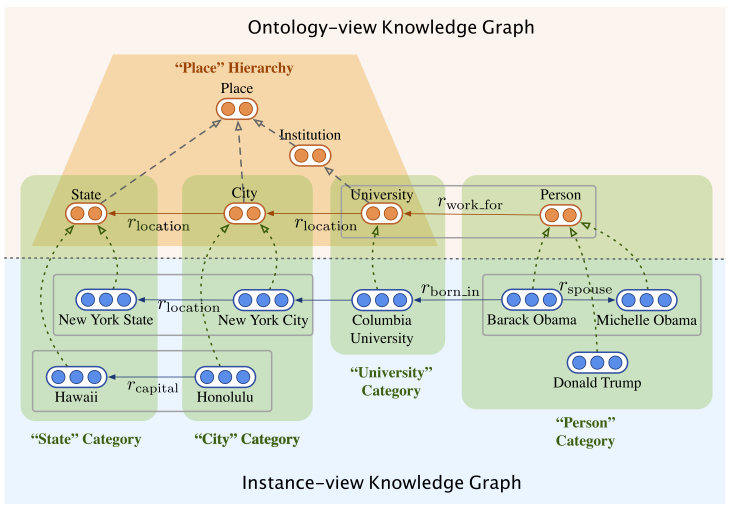

JOIE изучает два аспекта: *cross-view* модель изучает эмбеддинги по отношениям между графами сущностей и концептов
(пунктирные стрелки в зеленом поле “категория”). Модель *intra-view* изучает эмбеддинги из троек (серая рамка) в каждом представлении; Кроме того, *intra-view* с учетом иерархии
моделирует факты мета-отношений, которые формируют иерархии в онтологии (оранжевая трапеция “Иерархия”).

В статье рассматриваются следиющие три ключевых аспекта:

*Эмбеддинги графов знаний*. Основной задачей является создание функции оценки правдоподобия $f_r(h, t)$, где тройка $(h, r, t)$ соответствует ребру графа (вершины *head*, *tail* и ребро(связь) *relation* между ними). Рассматриваются три вида такой функции: *TransE, DistMult, HolE*.





При моделировании *intra-view* предлагается использовать одну из трех функций правдоподобия $f_r(h, t)$, где тройка $(h, r, t)$ соответствует ребру графа (вершины *head*, *tail* и ребро(связь) *relation* между ними). Рассматриваются три вида такой функции: *TransE, DistMult, HolE*, вычисляемые, соответственно, следующим образом:

$$f_{TransE}(h, r, t) = - ||h+r+t||_2$$
$$f_{Mult}(h, r, t) = (h \circ t) \cdot r$$
$$f_{HolE}(h, r, t) = (h \star t) \cdot r$$

Здесь $|| \cdot ||_2$ - евклидова норма, 

$\circ$ - произведение Адамара,

$\cdot$ - скалярное произведение,

$\star: \mathbb{R}^d\times\mathbb{R}^d  \rightarrow \mathbb{R}^d$, $[ a \star b]_k = \sum\limits_{i=0}^{d} a_i b_{(k+i)\mod d}$ - круговая корреляция.

Функция потерь имеет вид:

$$J_{Intra}^{\mathcal{G}} = 
\frac{1}{|\mathcal{G}|} 
    \sum
        \limits_{(h, r, t) \in \mathcal{G} \\ \land (h', r, t') \notin \mathcal{G}} \lbrack \gamma^{\mathcal{G}} + f(h', r, t')  - f(h, r, t) \|_2\rbrack_+ .$$ 
        
Вычислив ее значение для графов сущностей $\mathcal{G}_I$ и концептов $\mathcal{G}_O$, сможем вычислить объединенную функцию потерь для мультиграфа из $\mathcal{G}_I$ и $\mathcal{G}_O$:
$$J_{Intra} = J_{Intra}^{\mathcal{G_I}} + \alpha_1 J_{Intra}^{\mathcal{G_O}},\ \alpha_1>0.$$

Для перекрестного моделирования предлагаются два метода: 

1. **Cross-grouping (CG)** для случая, когда эмбеддинги концепций и эмбеддинги сущностей могут быть вложены в одно пространство эмбеддингов. Тогда происходит группировка категорий и их представителей с помощью следующей функции потерь: $J_{Cross}^{CG} = \frac{1}{|\mathcal{S}|} \sum\limits_{(e,c) \in \mathcal{S}} \lbrack \| c - e \|_2 - \gamma^{CG} \rbrack_+ $

2. **Cross-transformation (CT)** для случая, когда эмбеддинги концепций и эмбеддинги сущностей не могут быть вложены в одно пространство эмбеддингов и эмбеддинги сущностей необходимо преобразовать для вложение в пространство эмбеддингов концепций. Тогда происходит группировка категорий и их представителей с помощью следующей функции потерь: 
$J_{Cross}^{CT} = 
\frac{1}{|\mathcal{S}|} 
    \sum
        \limits_{(e,c) \in \mathcal{S} \\ \land (e, c') \notin \mathcal{S}} \lbrack \gamma^{CT} + \| c - f_{CT}(e) \|_2 - \| c - f_{CT}(e') \|_2\rbrack_+ $, 
        
    где $f_{CT}: e \rightarrow c, \forall (e, c) \in \mathcal{S}$.

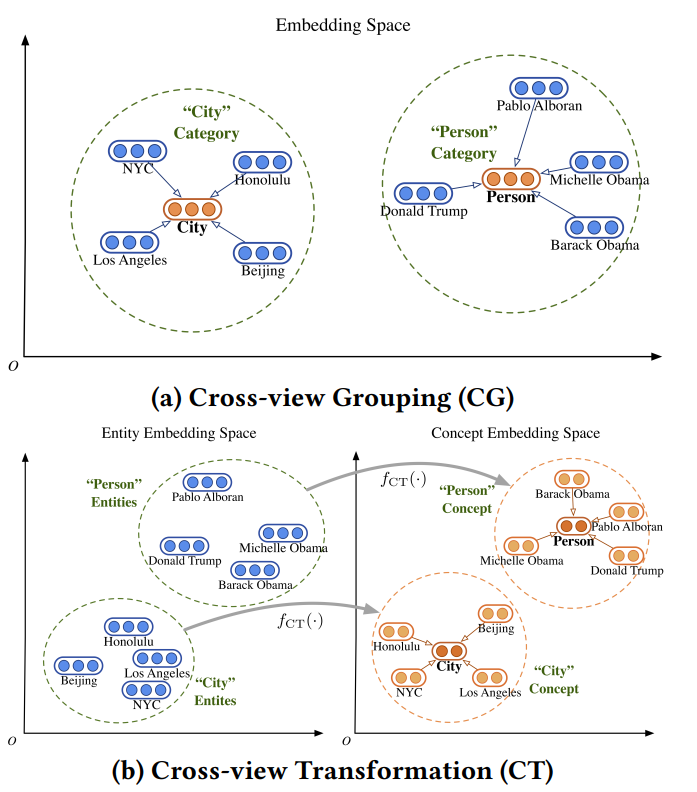

Для вычисления полной функции потерь вычисляется линейная комбинация $J = J_{Intra} + \omega \cdot J_{Cross} = J_{Intra} + \omega \cdot (J_{Intra}^{\mathcal{G_I}} + \alpha_1 J_{Intra}^{\mathcal{G_O}})$, $\alpha_1>0$, $\omega > 0$. Именно путем минимизации значения этой функции потерь выполняется построение модели в течение заданного количества эпох при помощи инструментов библиотеки `tensorflow`.

---
### Датасеты: DBpedia и Yago
https://github.com/JunhengH/joie-kdd19

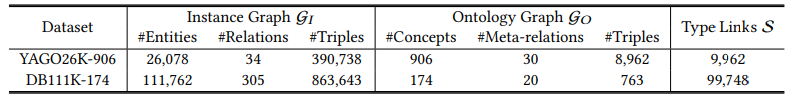

In [11]:
import pandas as pd
df1 = pd.read_csv('data/yago/yago_insnet_train.txt', sep = '\t', header = None)
df1

,0,1,2
0,Doğa_Kaya,isAffiliatedTo,Sivasspor
1,Darl_Douglas,playsFor,RBC_Roosendaal
2,Murcia–San_Javier_Airport,isConnectedTo,Sola
3,Mohamed_Sissoko,isAffiliatedTo,Juventus_F.C.
4,Pointe_Noire_Airport,isConnectedTo,Cadjehoun_Airport
...,...,...,...
351659,Diego_Gavilán,isAffiliatedTo,Grêmio_Foot-Ball_Porto_Alegrense
351660,Tupãzinho,playsFor,Esporte_Clube_XV_de_Novembro_(Piracicaba)
351661,Raul_Rusescu,playsFor,CS_Otopeni
351662,Alexis_Ubillús,isAffiliatedTo,Peru_national_football_team


In [12]:
df1.describe()

,0,1,2
count,351664,351664,351664
unique,21130,34,8993
top,Charles_de_Gaulle_Airport,isAffiliatedTo,male
freq,219,157550,14380


In [13]:
set(df1[1])

{'actedIn',
 'created',
 'dealsWith',
 'diedIn',
 'directed',
 'edited',
 'graduatedFrom',
 'happenedIn',
 'hasAcademicAdvisor',
 'hasCapital',
 'hasChild',
 'hasCurrency',
 'hasGender',
 'hasMusicalRole',
 'hasNeighbor',
 'hasOfficialLanguage',
 'hasWonPrize',
 'influences',
 'isAffiliatedTo',
 'isCitizenOf',
 'isConnectedTo',
 'isInterestedIn',
 'isKnownFor',
 'isLeaderOf',
 'isLocatedIn',
 'isMarriedTo',
 'isPoliticianOf',
 'livesIn',
 'owns',
 'participatedIn',
 'playsFor',
 'wasBornIn',
 'worksAt',
 'wroteMusicFor'}

In [14]:
df2 = pd.read_csv('data/dbpedia/db_InsType_train.txt', sep = '\t', header = None)
df2

,0,1,2
0,Joseph_Dalton_Hooker,type,scientist
1,Tripping_Daisy,type,band
2,Edyta_Górniak,type,person
3,The_Scooby-Doo_Show,type,television_show
4,North_American_Division_of_Seventh-day_Adventists,type,organisation
...,...,...,...
59843,Marc_Mysterio,type,musical_artist
59844,Roger_Fisher_(guitarist),type,musical_artist
59845,AD_(band),type,band
59846,Long_Island_Lighting_Company,type,company


In [15]:
df2.describe()

,0,1,2
count,59848,59848,59848
unique,59847,1,226
top,The_Black_Cauldron_(film)__The_Black_Cauldron__1,type,musical_artist
freq,2,59848,6999


---
### Запуск

Код проекта, опубликованный авторами статьи, состоит из модулей 

- `KG.py` (построение графа знаний на базе загруженных данных, преобразованных в числовые индексы), 

- `multiG.py` (построение мультиграфа, представляющего из себя комбинацию онтологии концепций и графа знаний представителей сущностей, соединенных ребрами-отношениями), 

- `model2.py` (создание эмбеддингов, векторных представлений словоформ, и их нормализация для дальнейшего обучения модели при помощи инструментов tensorflow. Здесь создаются тензорные объекты, однако конкретные значения будут загружены в них позже на каждой эпохе обучения. Рассчитываеются описанные выше score- и loss-функции, указываются минимизируемые величины - то есть указанные метрики), 

- `trainer2.py` (запуск tensorflow на данных мультиграфа, в течение заданного кол-ва эпох происходит процесс оптимизации моделя для уменьшения значений функции потерь),

- `training_model2_scai2.py` (сборка вышеописанных модулей, т.е. "main").

Так как код от 2019 года, то многие используемые пакеты/библиотеки/методы устарели и на актуальных версиях языка не запускаются. 

Для старта кода были подобраны необходимые для запуска старшие версии языка и пакетов/библиотек, которые использовались для создания окружения `py36.yaml` (прилагается) и скорректированны именования некоторых методов в коде для устранения огромного кол-ва предупреждений (из-за несостыковок пакетов). 

Проект запускается в конфигурации, написанной по шаблону:

`--kg1f ./data/yago/yago_insnet_train.txt
--kg2f ./data//yago/yago_ontonet_train.txt
--modelname ./models
--method transe
--bridge CMP-double
--alignf ./data//yago/yago_InsType_train.txt`, 

где указываются входные параметры, а именно расположения файлов, необходимых для обучения, и названия методов cross-view (`'CG'`,`'CMP-linear'`,`'CMP-single'`,`'CMP-double'`) и intra-view (`'transe'`,`'distmult'`,`'hole'`) моделирования. 

В  `training_model2_scai2.py` также необходимо задать желаемые параметры:

- указать размерность эмбеддингов/длину батчей внутри эпохи/learning rate в аргументах методов типа `parser.add_argument('--dim1', type=int, default=100, help='Entity dimension')`;

- в аргументах `m_train.train(epochs=100, <...>)` указывается необходимое кол-во эпох обучения.



---
### Результаты

На экран выводятся актуальные данные по процессу обучения, а именно: входные параматеры и прогресс по intra- для каждого графа и cross-view моделирования с номером длящейся эпохи обучения. Также по окончании каждой эпохи выводится время от запуска (сек) и пути сохранения чекпоинтов (параметров модели, значения тензоров для всех эпох).

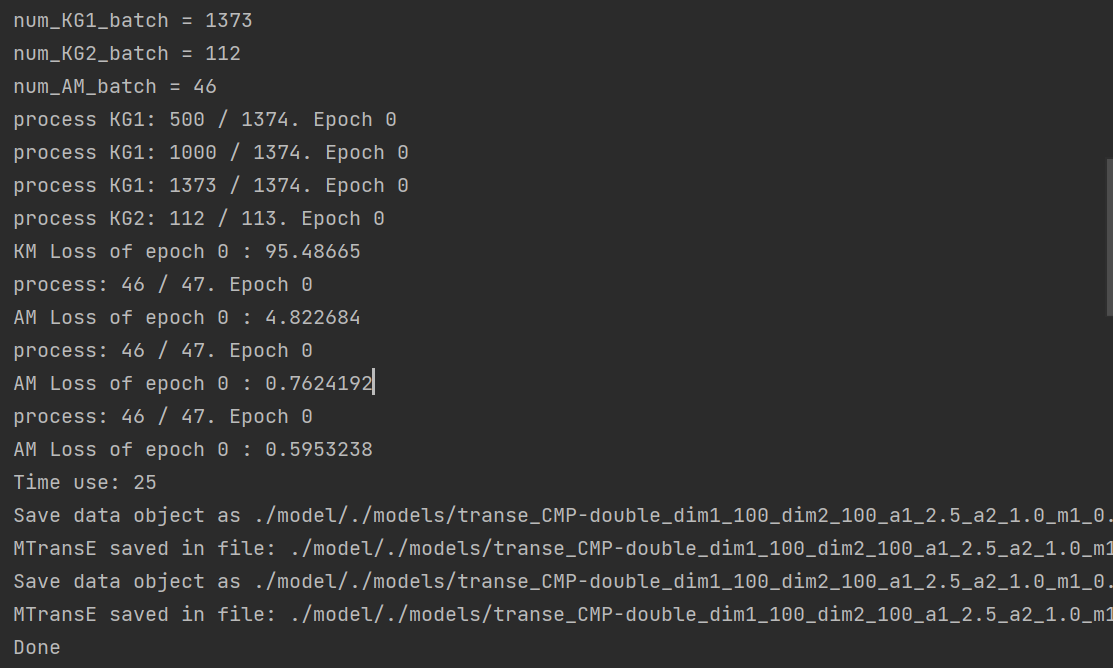

По окончании работы кода созданы новые файлы: чекпоинты (`.ckpt`) модели и `.bin` с описанием графов знаний. 

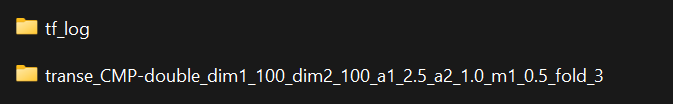

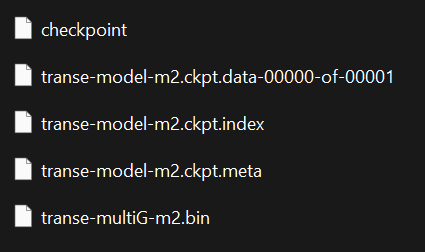

Ниже приведены некоторые манипуляции с файлом `.bin`.

In [16]:
import pickle

data = pickle.load(open('transe-multiG-m2.bin', 'rb'))

# список всех хранимых элементов
for i in data:
    print(i)

KG1
KG2
lan1
lan2
align
align_desc
aligned_KG1
aligned_KG2
aligned_KG1_index
aligned_KG2_index
unaligned_KG1_index
unaligned_KG2_index
align_valid
n_align
n_align_desc
ent12
ent21
batch_sizeK1
batch_sizeK2
batch_sizeA
L1
dim1
dim2


In [22]:
# список методов и атрибутов графа
dir(data['KG2'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'avg_embed',
 'avg_embed_padded',
 'batch_size',
 'corrupt',
 'corrupt_batch',
 'corrupt_pos',
 'desc_embed',
 'desc_embed_padded',
 'desc_index',
 'desc_length',
 'descriptions',
 'dim',
 'ent_index2str',
 'ent_str2index',
 'ent_tokens',
 'ents',
 'get_desc_embed',
 'hpt',
 'index_ents',
 'index_rels',
 'load',
 'load_descriptions',
 'load_stop_words',
 'load_triples',
 'load_word2vec',
 'loaded_wv',
 'map_descriptions',
 'n_ents',
 'n_rels',
 'n_tokens',
 'num_ents',
 'num_rels',
 'num_triples',
 'rel',
 'rel_index2str',
 'rel_str2index',
 'rels',
 'save',
 'token_index',
 'tokens',
 'tph',
 'triples',
 'triples_record'

In [17]:
# граф сущностей, записанный в виде троек hrt, 
# где вершины и ребра представлены своим индексом
data['KG1'].triples

array([[42674,     2,   747],
       [ 7525,    10, 22101],
       [ 8820,    36,   202],
       ...,
       [92922,    21, 12984],
       [34920,    18,  9839],
       [17727,    20, 21950]])

In [18]:
# словарь индексов и токенов сущностей
data['KG1'].ent_tokens

{0: {'The_Whites'},
 1: {'Country_music'},
 2: {'Frank_Hsieh'},
 3: {'Chen_Shui-bian'},
 4: {'Neil_Brady'},
 5: {'Montreal'},
 6: {'Carmen_Argenziano'},
 7: {'Sharon,_Pennsylvania'},
 8: {'Mustapha_Mansouri'},
 9: {'Abbas_El_Fassi'},
 10: {'Wander_Johannes_de_Haas'},
 11: {'Netherlands'},
 12: {'Tom_Harman'},
 13: {'Republican_Party_United_States'},
 14: {'Les_Mots_song'},
 15: {'Mylène_Farmer'},
 16: {'Gila_River'},
 17: {'San_Pedro_River_Arizona'},
 18: {'Arkansas_River'},
 19: {'Muskogee,_Oklahoma'},
 20: {'Ric_Ocasek'},
 21: {'Maryland'},
 22: {'Ultimate_Spider-Man_TV_series'},
 23: {'Brian_Michael_Bendis'},
 24: {'So_Appalled'},
 25: {'Kanye_West'},
 26: {'Ed_Miliband'},
 27: {'Gordon_Brown'},
 28: {'North_Little_Rock,_Arkansas'},
 29: {'Arkansas'},
 30: {'Antonello_Venditti'},
 31: {'Philips_Records'},
 32: {'William_Y._Thompson'},
 33: {'Louisiana'},
 34: {'John_Stuart_Mill'},
 35: {'Johann_Wolfgang_von_Goethe'},
 36: {'Erving_Goffman'},
 37: {'American_Academy_of_Arts_and_Scien

In [23]:
# словарь индексом и токенов концептов
data['KG2'].ent_tokens

{0: {'fish'},
 1: {'swimmer'},
 2: {'architect'},
 3: {'screen_writer'},
 4: {'artist'},
 5: {'continent'},
 6: {'lake'},
 7: {'country'},
 8: {'game'},
 9: {'animal'},
 10: {'club_moss'},
 11: {'plant'},
 12: {'musical_artist'},
 13: {'road'},
 14: {'town'},
 15: {'species'},
 16: {'mineral'},
 17: {'brewery'},
 18: {'beverage'},
 19: {'model'},
 20: {'school'},
 21: {'chancellor'},
 22: {'politician'},
 23: {'railway_station'},
 24: {'mayor'},
 25: {'place'},
 26: {'city'},
 27: {'year'},
 28: {'college'},
 29: {'person'},
 30: {'fungus'},
 31: {'food'},
 32: {'election'},
 33: {'engineer'},
 34: {'train'},
 35: {'volcano'},
 36: {'planet'},
 37: {'bird'},
 38: {'sea'},
 39: {'mountain'},
 40: {'video_game'},
 41: {'prime_minister'},
 42: {'government_agency'},
 43: {'economist'},
 44: {'newspaper'},
 45: {'amphibian'},
 46: {'valley'},
 47: {'wrestler'},
 48: {'athlete'},
 49: {'voice_actor'},
 50: {'actor'},
 51: {'film'},
 52: {'song'},
 53: {'album'},
 54: {'single'},
 55: {'nobl

С помощью инструментов `tensorboard` существует возможность визуализации полученной модели на основании сохраненных в чекпоинтах данных. Так можно увидеть, как в объеме (выбираются три наиболее "значимые" из `dim1`/`dim2`) выглядят эмбеддинги и найти ближайших соседей у заданных представителей, сгруппировав по заданному признаку (например, по типу связей).

Для запуска `tensorboard` необходимо в командной строке Anaconda Powershell Promt активировать нужное окружение: `conda activate py36`, и из папки, где хранятся чекпоинты запустить ` tensorboard --logdir=\.`. В окне браузера (`http://localhost:6006/`) будет открыт projector.

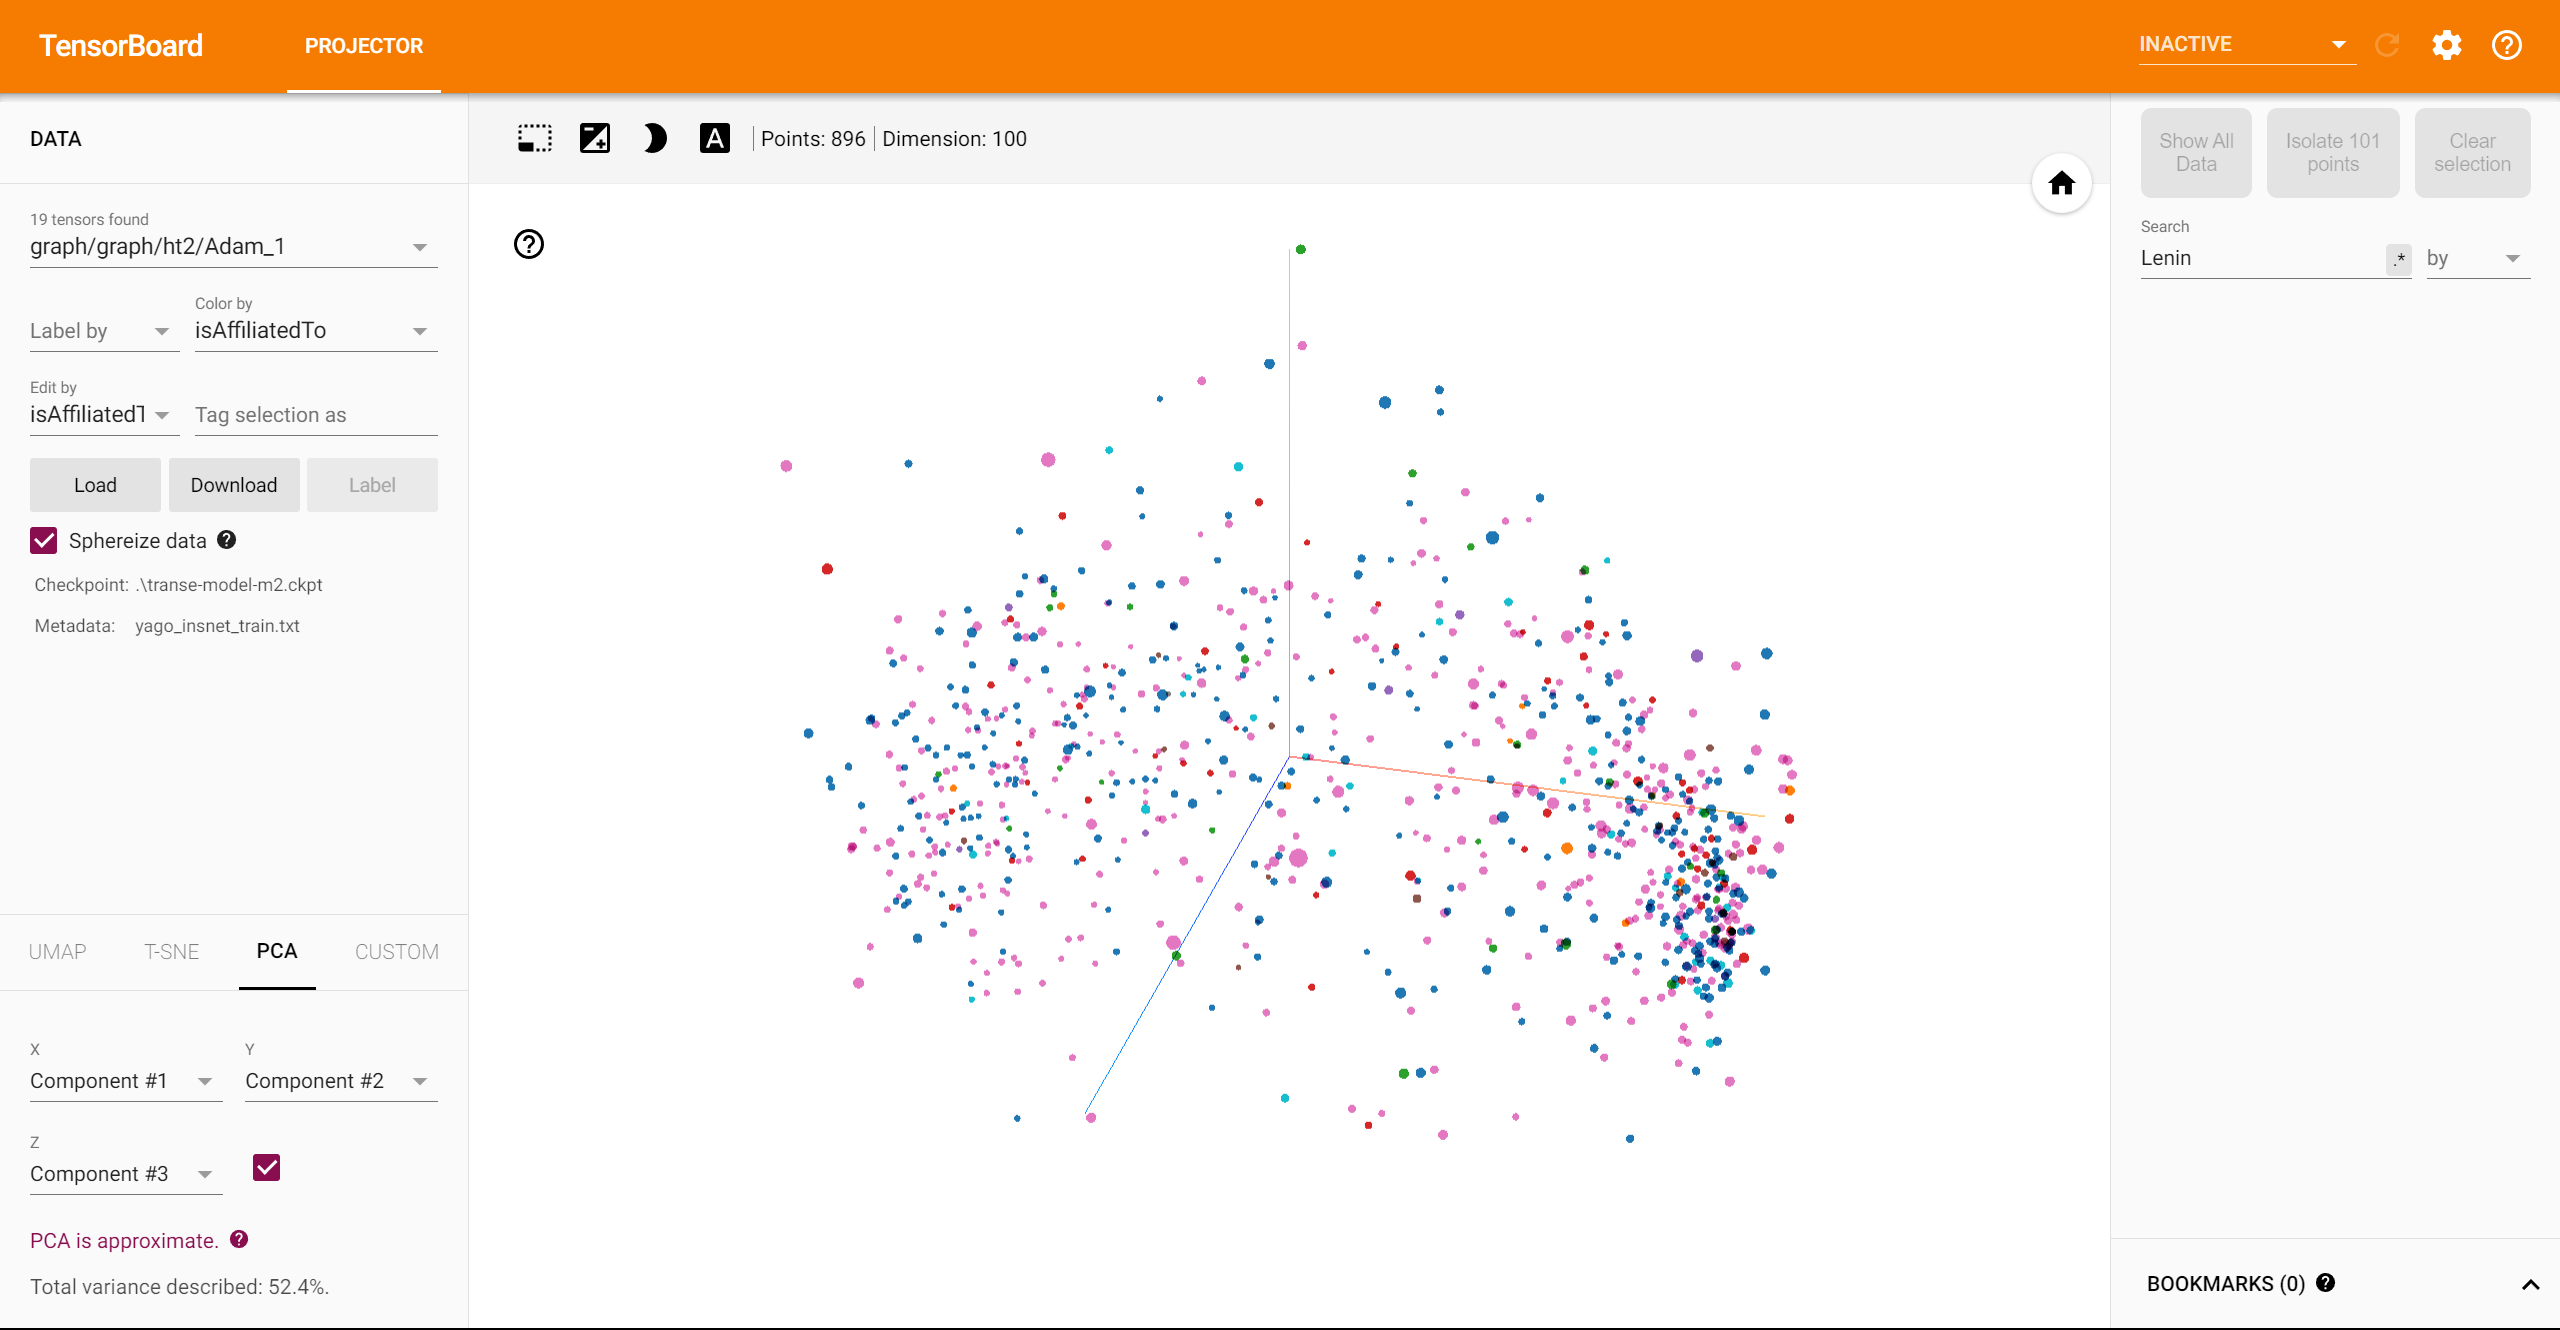

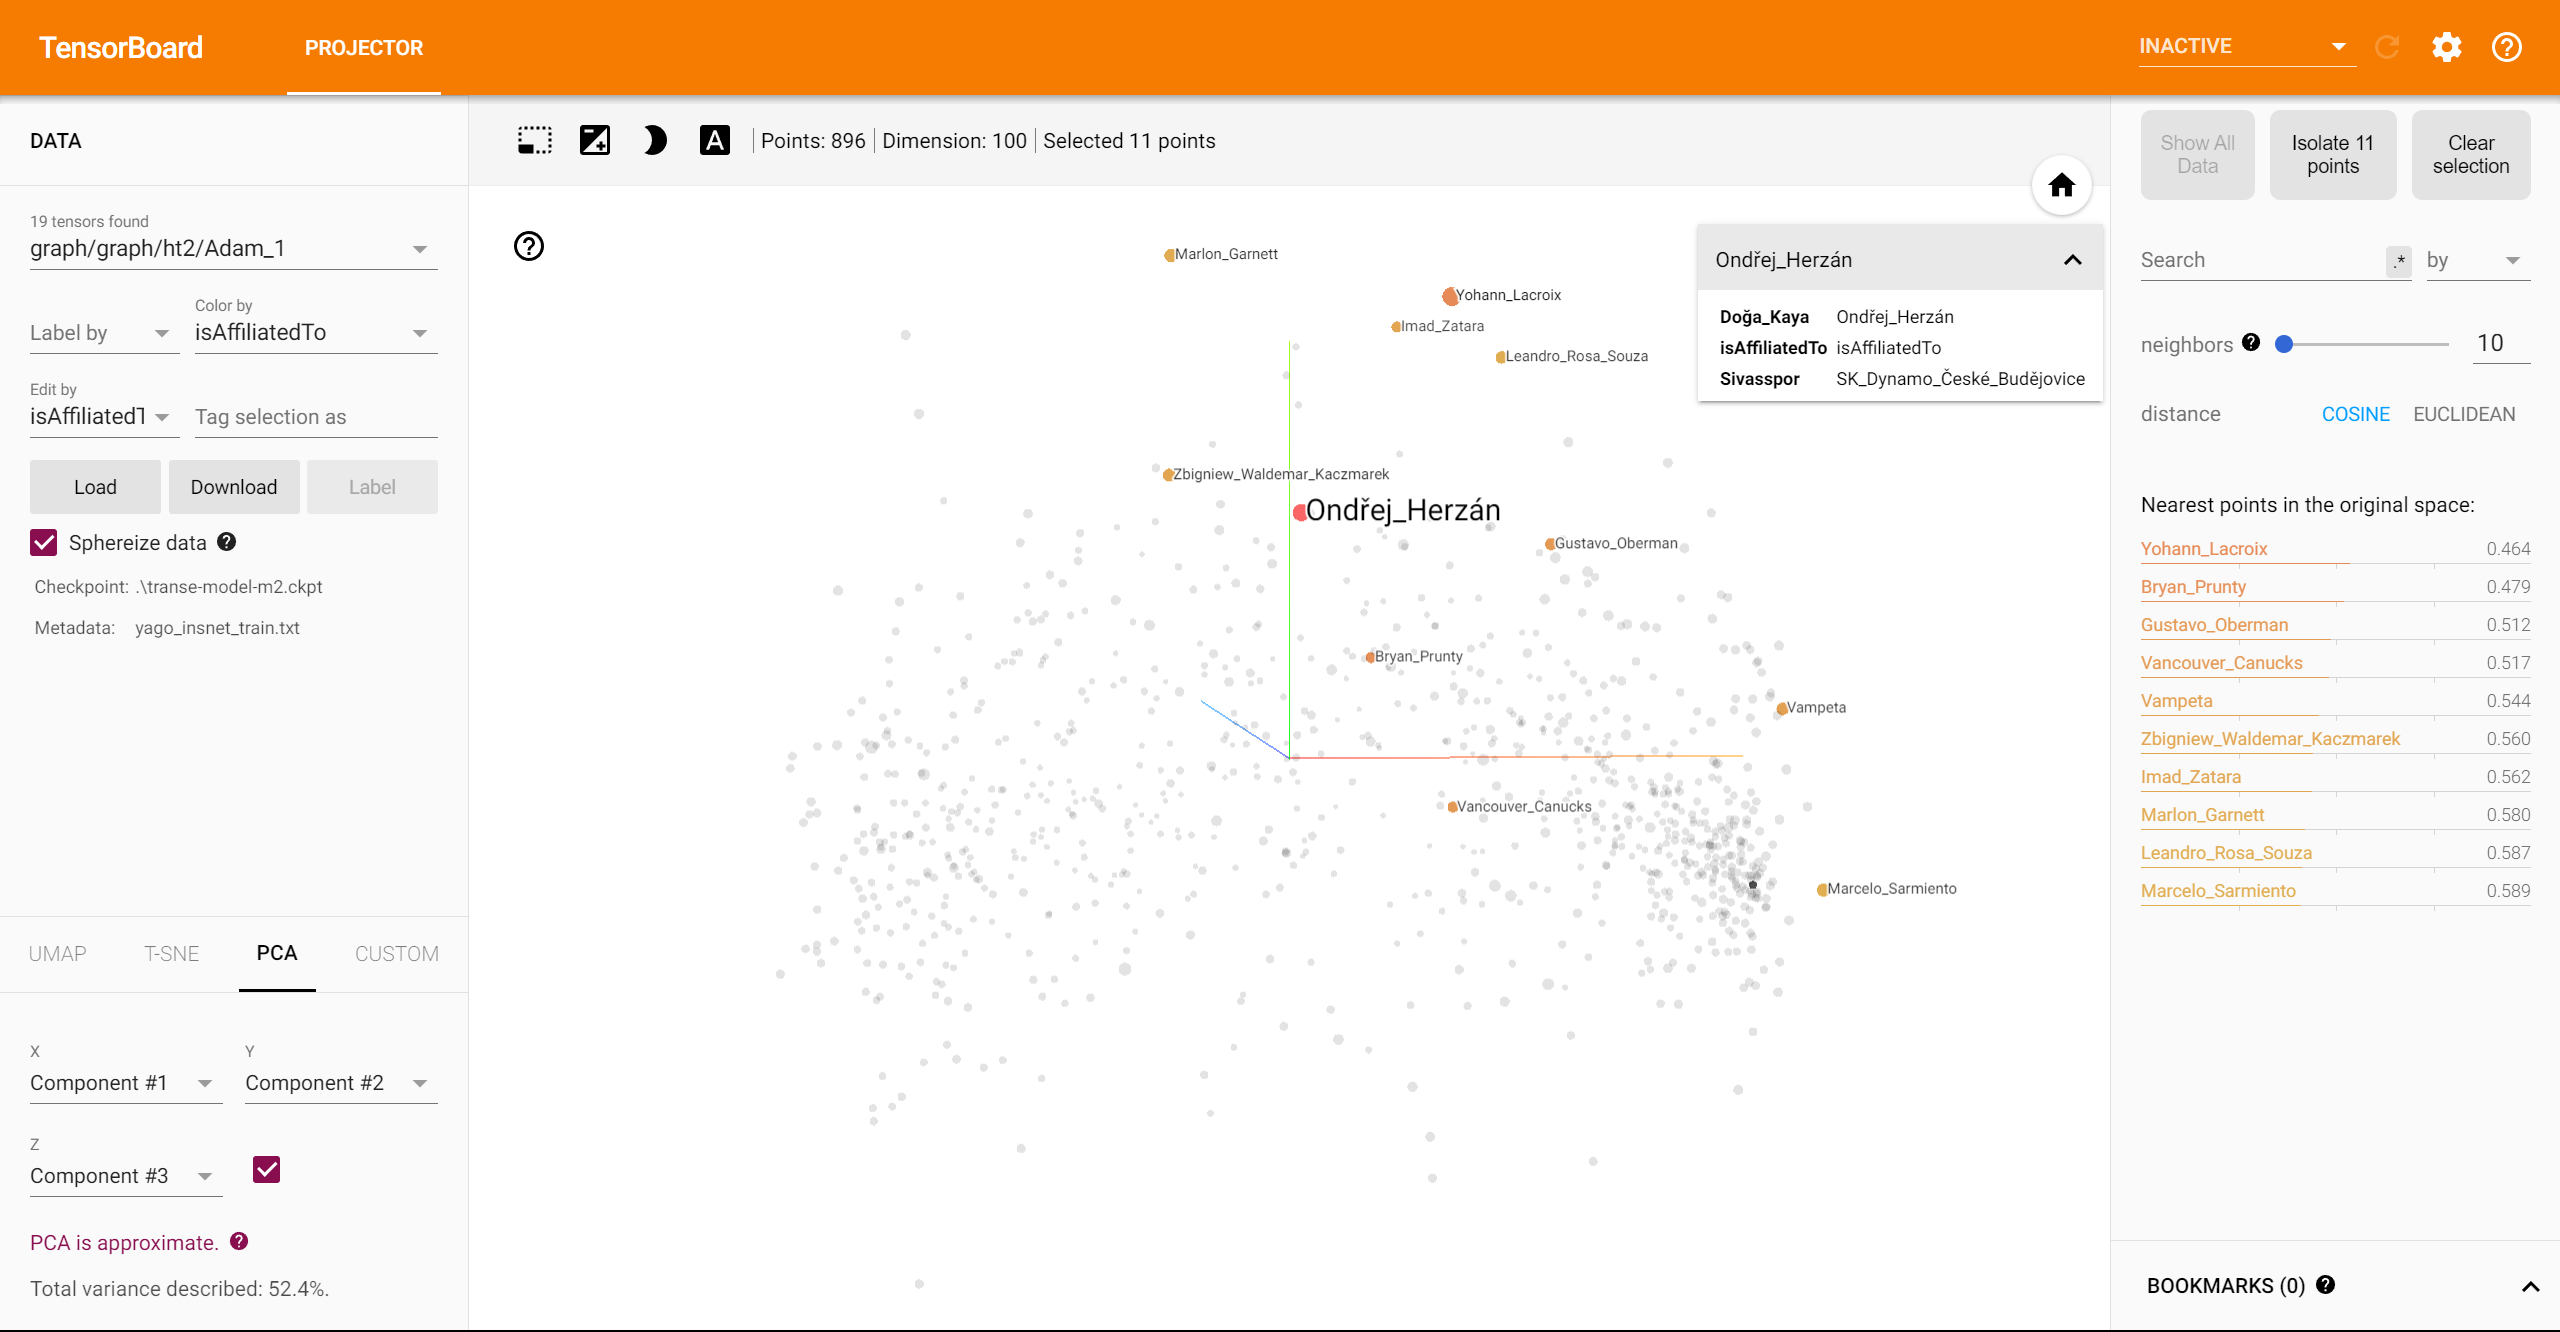

---
### Список литературы

#### Основная литература
-	J. Hao, M. Chen, W. Yu, Y. Sun, W. Wang. Universal Representation Learning of Knowledge Bases by Jointly Embedding Instances and Ontological Concepts. KD, August 4–8, 2019 (https://dl.acm.org/doi/pdf/10.1145/3292500.3330838).
-	М.В. Коротеев. Учебное пособие по дисциплине “Анализ данных и машинное обучение” - 2023.
-	С. В. Макрушин. Учебное пособие по дисциплине “Теория сложных сетей в экономике / Машинное обучение на графах”, 2022 в. Учебное пособие по дисциплине “Анализ данных и машинное обучение” - 2018.
-	Документация библиотеки `tensorflow` (https://www.tensorflow.org/api_docs/python/tf/compat/v1).
    

##### Дополнительная литература
-	A. Geron. Hand on Machine Learning with scikit-learn and Tensorflow - 2017 (564p)
-	C. Albon. Machine learning with Python Handbook - 2018 (427p)
-	L.P. Coelho, W. Richert. Building machine learning systems with Python - 2015 (326p)
-	J. Grus. Data science from scratch - 2015 (330p)
-	W. McKiney. Pandas: powerful Python data analysis toolkit - 2016 (1971p)
